# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

First of all, we imported the function optimize from the package "scipy" and we identified the various variables. The values are the ones given in question 1 and we only randomly gave the value 1 to the wage ratio w. We solved the maximization problem coding firstly the utility function and subsequently the total resources constraint, the objective function and the optimizer. As the function "optimize" is used in the case of minimization problems, we enter utility with a negative sign in "opt_choice". We probably made a mistake in the code as we obtain an utility of 0, a result that seems pretty strange.

In [17]:
import numpy as np
from scipy import optimize
# A. Define variables value
m = 1 #cash-on-hand
v = 10 #scale the disutility of labour
eps = 0.3 #Frish-elasticity
t_0 = 0.4 #standard labour income tax
t_1 = 0.1 #top bracket labour income tax
kappa = 0.4 #cut-off for the top labour income bracket
w = 1 #rate-wage

# B. define utility
def util(c,v,l,eps):
    return np.log(c) - v*(l**(1+(1/eps)))/(1+(1/eps))

# C. define constraint
def cash_constr(m, t_0, t_1, w, l, kappa):
    return m + w*l - (t_0*w*l + t_1*max(w*l - kappa, 0))

# D. Define objective function
def optimal_choice( l, w, eps, t_0, t_1, kappa, v):
    c = cash_constr(m, t_0, t_1, w, l, kappa)
    return - util(c , v, l, eps)

# E. Call optimizer and calculate optimum
def opt_problem(m, w, eps, v, t_0, t_1, kappa):
    res = optimize.minimize_scalar(optimal_choice, method='bounded', bounds=(0,1), args=(w, eps, t_0, t_1, kappa, v))    
# e.1 Calculate optimal l,x,u
    l = res.x
    c = cash_constr(m, t_0, t_1, w, l, kappa)
    ut = util(c, v, l, eps)
    return l, c, ut

optimal_l = opt_problem(m, w, eps, v, t_0, t_1, kappa)[0]
optimal_c = opt_problem(m, w, eps, v, t_0, t_1, kappa)[1]
optimal_ut = opt_problem(m, w, eps, v, t_0, t_1, kappa)[2]

# F. Print result
print(f'Optimal labour supply is: {optimal_l:.3f}')
print(f'Optimal consumption is: {optimal_c:.3f}')
print(f'maximized utility is: {optimal_ut:.3f}')

Optimal labour supply is: 0.400
Optimal consumption is: 1.240
maximized utility is: 0.172


# Question 2

We realize two graphs: the left picture captures the relationship between the wage rate and the optimal consumption, meanwhile the right graph the relationship between the wage rate and the optimal supply of labour.
From the figures we can detect that both optimal consumption and labour-supply tend to increase when the wage rate increases.


<function matplotlib.pyplot.show(*args, **kw)>

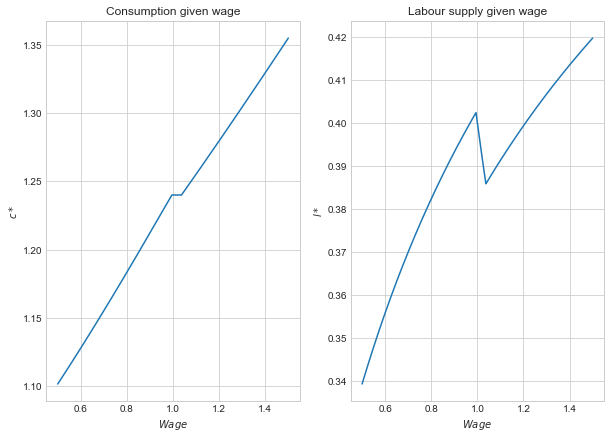

In [16]:
import matplotlib.pyplot as plt # baseline modul
plt.style.use('seaborn-whitegrid') 

# A. setting
N=10000
w_min = 0.5
w_max=1.5
# B.
w_values = np.linspace(w_min, w_max, N)
c_values = np.empty(N)
l_values = np.empty(N)
for i,w in enumerate(w_values):
    ver=opt_problem(m, w, eps, v, t_0, t_1, kappa)
    l_values[i]=ver[0]
    c_values[i]=ver[1]
fig = plt.figure(figsize=(10,7))
#C. Left figure
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_values,c_values)
ax_left.set_title('Consumption given wage')
ax_left.set_xlabel('$Wage$')
ax_left.set_ylabel('$c*$')
ax_left.grid(True)

#D. Right figure
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_values,l_values)
ax_right.set_title('Labour supply given wage')
ax_right.set_xlabel('$Wage$')
ax_right.set_ylabel('$l*$')
ax_right.grid(True)

#E. Show pictures
plt.show


# Question 3

We calcute the total tax revenue. Firstly, we draw a random vector of individual values wi from the range defined in point 2. Subsequently we define the tax revenue function obtained using the optimal values l*. 
We find the tax amount for each individual i and then we sum them all. The total tax revenue is approximately 75.

In [ ]:
N= 10000
np.random.seed(2000)
wi_values =  np.random.uniform(w_min,w_max,N)
li_values = np.empty(N)
c_values = np.empty(N)
for i,w in enumerate (wi_values):
    bundle = opt_problem(w,eps,v,teta_0,teta_1,kappa,m)
    li_values[i] = bundle[0]
tax_revenue = lambda li_values, wi_values: teta_0*wi_values*li_values + teta_1 * np.fmax(wi_values*li_values-kappa,0)
tax = tax_revenue (li_values,wi_values) # individual tax revenues
print(tax)
tot_tax = np.sum(tax)
print(tot_tax) # total tax revenue

# Question 4

We measure the effects that a change in the Frish-elasticity (eps) has on labor supply and subsequently in the tax revenue.
In particular, we expect an increase in the total tax revenue as the elasticity decreases (as we can notice from the labor supply formula). The total tax revenue is approximately 3190.

In [ ]:
eps = 0.1
N = 10000
np.random.seed(2000)
wi_values = np.random.uniform(w_min,w_max,N)
li_values = np.empty(N)
c_values = np.empty(N)
for i,w in enumerate(wi_values):
    bundle = opt_problem(m, w, eps, v, teta_0, teta_1, kappa)
    li_values[i]= bundle [0]

tax_revenue = lambda li_values, wi_values: teta_0*wi_values*li_values + teta_1 *np.fmax(wi_values*li_values-kappa,0)
tax = tax_revenue(li_values,wi_values) #individual tax revenues
print(tax)
tot_tax = np.sum(tax)
print(tot_tax) # total tax revenue

# Question 5

To answer this question, we should maximize the tax revenue with the purpose of finding the optimal teta_0,teta_1, and kappa. Function tax_rev returns the negative of the total tax revenue function defined in question 4 as the function "optimize" works for minimization problems.

In [ ]:
def tax_rev(pol, li_values, wi_values):
    teta_0 = pol[0]
    teta_1 = pol[1]
    kappa = pol[2]
    return - np.sum(tax(teta_0, teta_1, kappa, li_values, wi_values))

# Bounds for teta_0, teta_1 and kappa
bounds = ((0,1),(0,1),(0,1)) #It doesn't have sense to have a tax or cut-off lower than 0 or higher than 1.

# Initial guesses for teta_0, teta_1 and kappa taken from question 1
init_values = [(0.4),(0.1),(0.4)]

# Calculate the optimal teta_0, teta_1 and kappa
solution = optimize.minimize(tax_rev, init_values, args=(i), method='SLSQP', bounds = bounds)

teta_0 = solution.pol[0]
teta_1 = solution.pol[1]
kappa = solution.pol[2]

def exp_revenue (teta_0, teta_1, kappa, li_values, wi_values):
    return teta_0*wi_values*li_values + teta_1*max(wi_values*li_values - kappa, 0)

print(f'Optimal standard labour income is {teta_0:.3f}')
print(f'Optimal top bracket labour income tax is {teta_1:.3f}')
print(f'Optimal cut-off (kappa) is {kappa:.3f}')
print(f'Expected revenue obtained = {exp_revenue:.3f}')

# Conclusion

Besides the strange result obtained in question 1, we have problems in coding the tax_rev function in question 5.